# Filterkategorisierung / Erkennen von Filtern mit Machine Learning

Ein Projekt von:

**Erik Jansky (5980253),**
**Dennis Köhler** und 
**Martin Sandig (8857640)**

## Idee

Die Idee dieses Projekts ist, eine Filtererkennung mit Hilfe von Convolutional Neural Networks (CNNs) zu ermöglichen. 
Hierzu wird das [Filter Aesthetic Comparison Dataset (FACD)](https://wtwilsonsun.github.io/FACD/) von Wei-Tse Sun, Ting-Hsuan Chao, Yin-Hsi Kuo, Winston Hsu verwendet.  

Das Dataset besteht aus 23 verschiedenen Klassen (Filter - inkl. Original-Bilder) mit jeweils 1280 Bildern. Alle Klassen bauen dabei auf den gleichen Originalbildern auf. Die Filter orientieren sich dabei an den typischen Instagramm-Filtern. Zur Erstellung der Bilder wurde dabei das GimpToolkit verwendet.

## Ziel

Ziel dieses Projekts ist es, herauszufinden ob man Bilder anhand von Filtern klassifizieren kann. Hierdurch wäre es beispielsweise denkbar Fotos auf Instagram bezüglich einer Filterverwendung zu überprüfen. Bei vielen Filtern ist es nämlich so, dass man deren Verwendung nicht auf den ersten Blick erkennen kann. 

## Aufbau

Das Projekt selbst ist in mehrere Jupyter-Notebooks aufgeteilt, in welchen verschiedene Klassifikationsalgorithmen getestet werden.

Die verwendeten Algorithmen sind:
- DecisionTree
- RandomForest
- Convolutional Neural Network 

Hierbei werden bei den verschiedenen Algorithmen ebenfalls unterschiedliche Herangehensweisen ausprobiert. 
Beispielsweise werden die Modelle darauf geprüft, ob sie Filter auch in Graustufen unterscheiden können oder nur in Farbe. 
Weiterhin werden mögliche Parameter bei den Modellen getestet als auch verschiedene Skalierungen getestet. 

## Import Packages

In [9]:
# Import Helpers and Plots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

## Laden und Testen der Modelle

Leider haben wir (mehr oder weniger) zuspät festgestellt, dass man mit dem Tool "pickle" die Modelle, die man mit sklearn erzeugt hat, in Dateien speichern kann. Dies war uns im Nachgang nicht möglich, da der Rechner zum Trainieren der Modelle nicht mehr zur Verfügung stand.

Lediglich die Keras / Tensorflow Modelle wurden während / nach dem trainieren gespeichert.

### Laden der Testbilder

In [21]:
# create a image generator for keras, that can load and prepare images batchwise
data_generator_vgg16 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, ## vgg16 preprocessing
)

data_generator_gray = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

target_size = (224,224) 
test_data_path = "./testbilder"


iterator_rgb_all = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_vgg16, target_size=target_size, color_mode='rgb', class_mode='categorical',batch_size=5
)


iterator_rgb_five_classes = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_vgg16, target_size=target_size, color_mode='rgb', class_mode='categorical',batch_size=5,
    classes=["1977", "Amaro", "Apollo", "Brannan", "Earlybird"]
)

iterator_gray_all = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_gray, target_size=target_size, color_mode='grayscale', class_mode='categorical',
    batch_size=5
)

iterator_gray_two_classes = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_gray, target_size=(400,400), color_mode='grayscale', class_mode='categorical',
    batch_size=5, classes=["Origin", "Amaro"]
)

Found 115 images belonging to 23 classes.
Found 25 images belonging to 5 classes.
Found 115 images belonging to 23 classes.
Found 10 images belonging to 2 classes.


### Keras - Weniger tiefes CNN - 5 Filter in Farbe

In [19]:
keras_five_filters_color_few_layers = tf.keras.models.load_model('keras_five_filters_color_few_layers.hdf5')

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


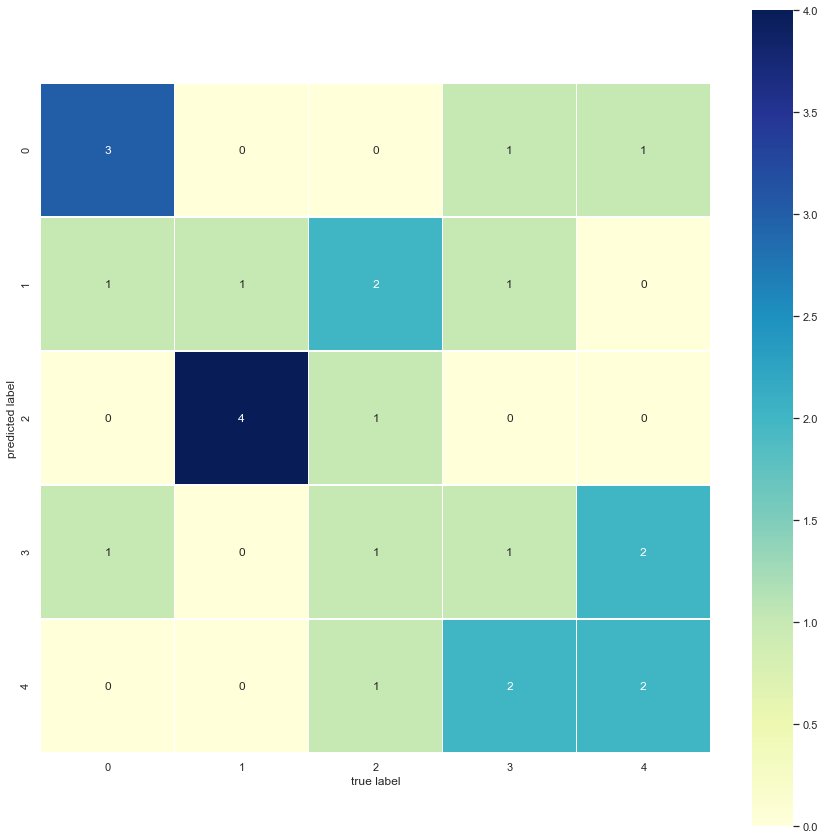

In [23]:
prediction = keras_five_filters_color_few_layers.predict(iterator_rgb_five_classes, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_five_classes.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

### Keras - Tiefes CNN - Alle Filter in Farbe
Zunächst laden wir das CNN-Model aus der zuvor erstellten Datei.

In [6]:
keras_all_filters_color_many_layers = tf.keras.models.load_model('keras_all_filters_color_many_layers.hdf5')

Als nächste führen wir die Prediction durch und zeigen die Ergebnisse in einer Confusion Matrix an.

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


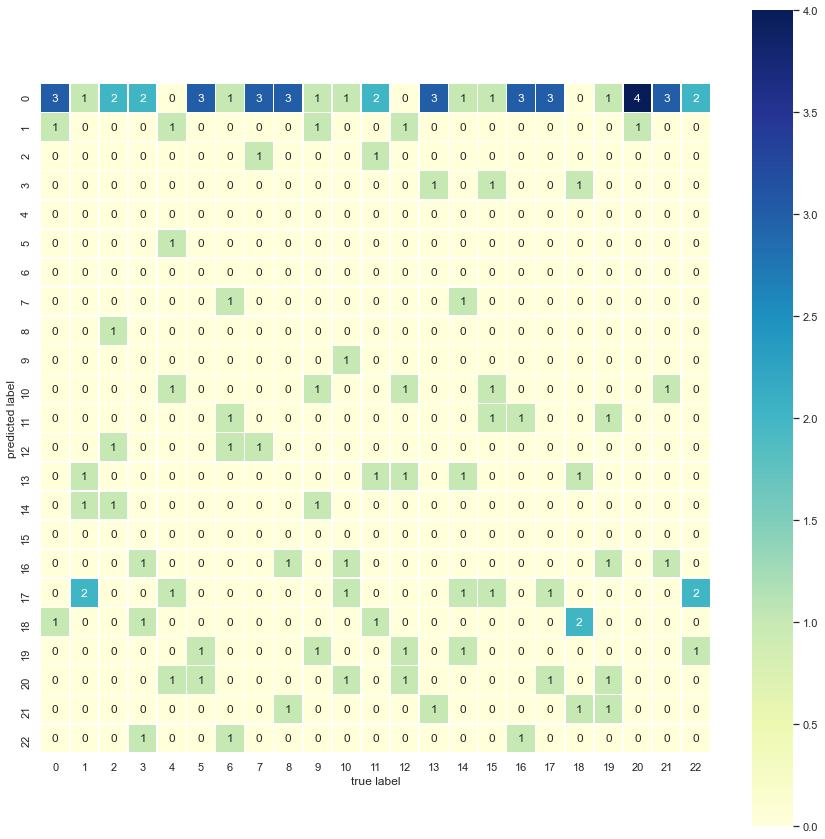

In [49]:
prediction = keras_all_filters_color_many_layers.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

Wie zu sehenn ist, hat die Klassifikation nicht besonders gut funktioniert. Die meisten Bilder werden als Filter "1977" klassifiziert. Teilweise werden Klassen bzw. Filter gar nicht erkannt bzw. predicted (z.B. Earlybird und Rise).

Der Grund hierfür könnte darin liegen, dass das Modell nicht ausreichend trainiert bzw. mit zu wenig Daten trainiert worden ist. Schaut man sich die Genauigkeit beim Training und Validieren an, so erkennt man, dass diese gerade einmal 60% übersteigt, was für so ein Modell nicht ausreichend ist.

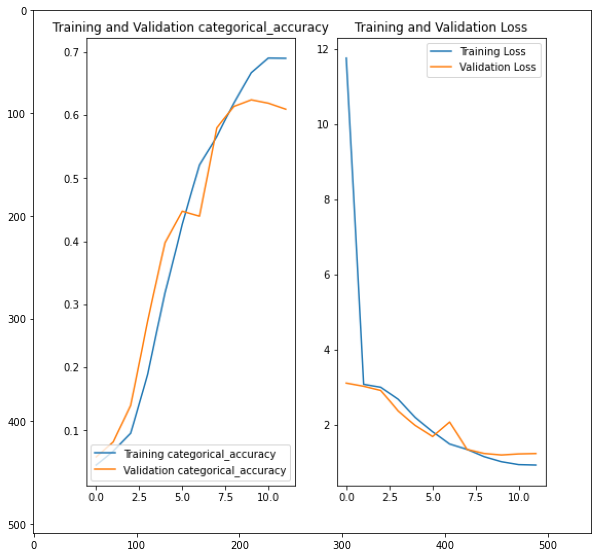

In [8]:
img = mpimg.imread("keras_all_filters_color_many_layers/accuracy.png")
plt.subplots(figsize=(10,10)) 
imgplot = plt.imshow(img)

Nun soll hier noch ein älteres Modell der selben Art getestet werden.

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


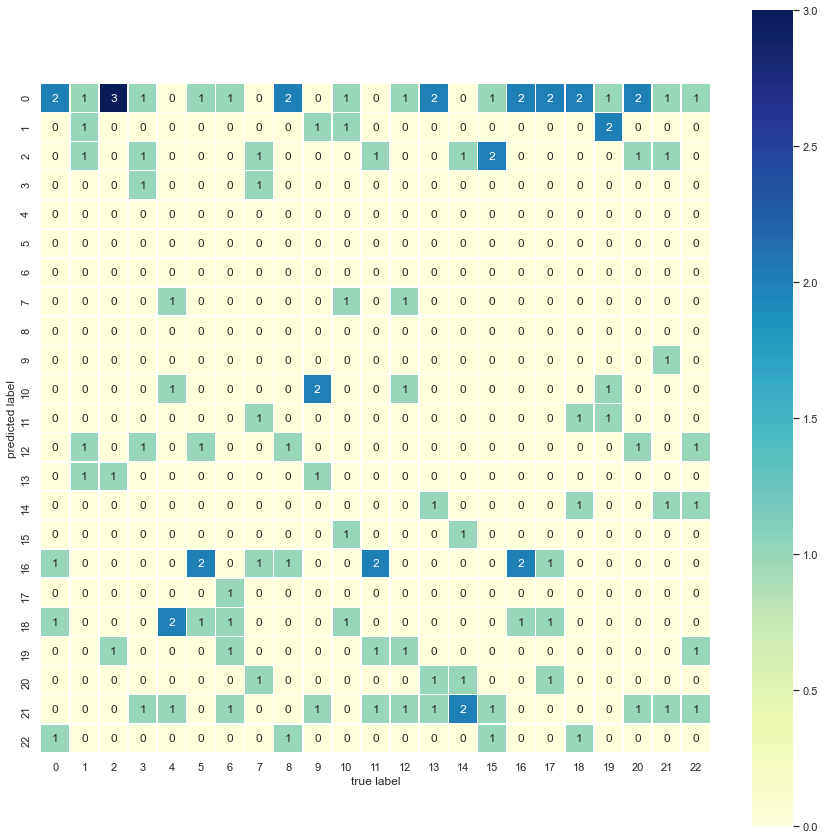

In [11]:
keras_all_filters_color_many_layers2 = tf.keras.models.load_model('keras_all_filters_color_many_layers2.hdf5')
prediction = keras_all_filters_color_many_layers2.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

Wie zu sehen ist wird "1977" nicht mehr so oft klassifiziert wie zuvor jedoch ist das Ergebnis nicht besser.

### Keras - Weniger Tiefes CNN - Alle Filter in Farbe - geringe BatchSize

Nun wird ein Modell getestet, welches weniger Schichten besitzt und nur in kleinen Schritten trainiert wurde.

In [18]:
keras_all_filters_color_few_layers = tf.keras.models.load_model('keras_all_filters_color_few_layers.hdf5')
prediction = keras_all_filters_color_few_layers.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

OSError: SavedModel file does not exist at: keras_all_filters_color_few_layers.hdf5/{saved_model.pbtxt|saved_model.pb}

### Keras - Weniger Tiefes CNN - Alle Filter in Farbe - höhere BatchSize

Nun wird ein Modell getestet, welches weniger Schichten besitzt und mit größeren Schritten trainiert wurde.

In [ ]:
keras_all_filters_color_few_layers_highBatchSize = tf.keras.models.load_model('keras_all_filters_color_few_layers_highBatchSize.hdf5')
prediction = keras_all_filters_color_few_layers_highBatchSize.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

### Keras - Tiefes CNN - Graustufen - Original zu Filter

Als nächstes wird das Modell betrachtet, welches nur einen Filter vom Original unterscheiden soll.
Die Prodzedur ist äquivalent zum vorherigen.

In [13]:
keras_one_filter_compared_original_grayscale = tf.keras.models.load_model('keras_one_filter_compared_original_grayscale.hdf5')

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


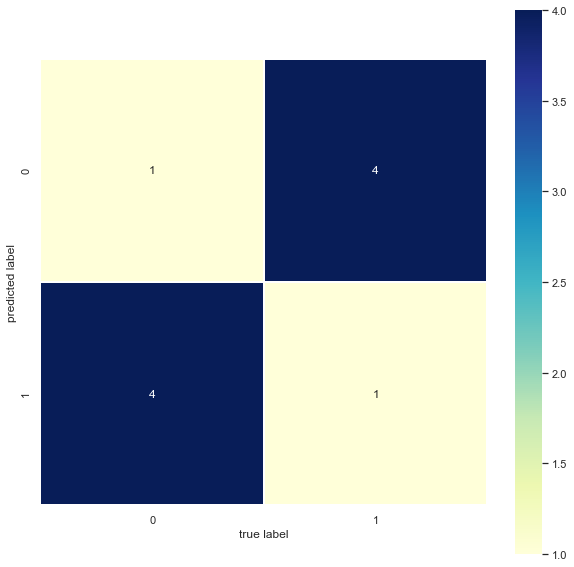

In [17]:
prediction = keras_one_filter_compared_original_grayscale.predict(iterator_gray_two_classes, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_gray_two_classes.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

Das Ergebnis entspricht der Erwartung, da beim Trainieren 95% Validierungsgenauigkeit herausgekommen ist. Im Wesentlichen wird vermutlich der in den anderen Notebooks gezeigt schwarze Rand der Filterbilder erkannt.

### Keras - Weniger Tiefes CNN - Alle Filter - Graustufen

In [ ]:
keras_all_filters_grayscale_few_layers_highBatchSize = tf.keras.models.load_model('keras_all_filters_grayscale_few_layers_highBatchSize.hdf5')
prediction = keras_all_filters_grayscale_few_layers_highBatchSize.predict(iterator_gray_two_classes, verbose=0)
prediction = np.round(prediction)

mat = confusion_matrix(y_true=iterator_gray_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)